# COMP20230 Lab 1: Complexity Analysis

In order to express the complexity of an algorithm, we can count the number of machine instructions or basic operations that will execute as a function of the input parameters. Counting the operations can give us the running time $T(n)$. This can be simplfied to give us the complexity, $\mathcal{O}$ or big-Oh, by removing constants from the equation that would have a small impact on the overall complexity for very large values of $n$.



## 1. Complexity in Python

The complexity of an algorithm depends on the number of basic operations it contains. In this first exercise you will evaluate the complexity of simple Python functions - instead of algorithms. The idea is the same as algorithm analysis: identify the operations, count them. Take particular care of the loops.
Here is an example:

In [ ]:
def function_a (n) :
    print("hello")
    for i in range(n):
        print("n = ", n, "; i=", i) 
    print (" bye ")

In [2]:
function_a(5)

hello
n =  5 ; i= 0
n =  5 ; i= 1
n =  5 ; i= 2
n =  5 ; i= 3
n =  5 ; i= 4
 bye 


The program enters n times in the loop \-  checking the loop condition takes 1 operation (incrementing *i*). The program does only 1 operation every time it enters the loop \- we have 1 * n operations here. Outside the loop there are 2 simple instructions (one before and one after) which do only 1 operation each.

In [3]:
def function_a(n):
    print("hello")          #1 operation
    for i in range(n):      #2 operation (assignment) per loop, N loops
        print("n = ", n)    #1 operation per loop, N operations
    print("bye")            #1 operation 

The running time of this algorithm is computed as follows: every operation with a "per loop" gives a factor of n: here 2 operations, so *3n*; every operation without a "per loop" gives you a value without an _n_: here 2. So in total, T(n)=3n + 2 meaning it is $\mathcal{O}$(n).

In the cell below we have a _magic_ command. These are notebook and not python commands. %%time will request that the OS times the execution of the cell for us and returns it in the cells output.

In [6]:
%%time

def function_b(n):
    print("starting for",n, "loops")          #1 operation
    for i in range(n):                        #2 operation (assignment) per loop, N loops
        for j in range(n):                        #2 operation (assignment) per loop, N loops
            max=n                             #1 operation per loop, N operations
    print("max n=",n)                         #1 operation 

a=6000
function_b(a)

starting for 6000 loops
max n= 6000
Wall time: 724 ms


We can run the cell repeatedly, changing the value for a. I have done 7 example tests below and recoded the times. I then used the matplotlib (which intalls by default as part of anaconda) to plot $n$ against $t$.

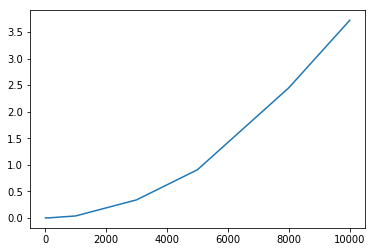

In [7]:
n=[10,100,1000,3000,5000,8000, 10000]

t=[444e-6,619e-6,37.3e-3,340e-3,907e-3,2.45,3.72]

import matplotlib.pyplot as plt
plt.plot(n,t)
plt.show()

Now do the same for the following 5 programs, labelling the operations and running for various values of $n$ and $m$ to validate the big-$\mathcal{O}$ experimentally. Watch out for the loop definitions.

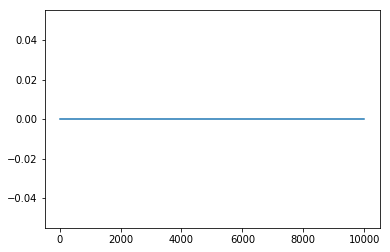

In [21]:
import matplotlib.pyplot as plt
import time


start = time.time()

def function_1(n):               #1 op defining function
    for i in range(11):          #2 ops assignment and go through range
        return i*n               #1 op print 
     

finish = time.time()

total_time = (finish - start)


def cool():

    n=[10,100,1000,3000,5000,8000, 10000]
    t=[]

    for i in n:
        function_1(i)
        t.append(total_time)

#     return t
    plt.plot(n,t)
    plt.show()


cool()





In [9]:
%%time

def function_2(n):
    s=1
    for i in range(n):
        s=s+i**2
    return s

function_2(10000)

Wall time: 7.98 ms


In [10]:
%%time

def function_3(n):
    s=1
    for i in range(n):
        for j in range(n):
            s=s+i*j
    return s

function_3(1000)

Wall time: 78.8 ms


In [11]:
%%time

def function_4(n,m):
    i=1;j=1
    opcount=2
    while i<=n and j<=m:
        i=i+1
        j=j+1
        opcount+=2
    print(opcount)

function_4(10000,10000)

20002
Wall time: 997 µs


In [15]:
%%time

def function_5(n,m):
    i=1;j=1;s=1
    while i<=n:
        if j<=m:
            s=s*j
            j=j+1
        else:
            s=s+i
            i=i+1
    return s

function_5(5,5)

Wall time: 0 ns


Run these programs with different values of the $n$ and $m$ parameters. Pick one and experiment on plotting the times. Does the graph match the big-$\mathcal{O}$ you expected?

## 2. Poison Puzzle

An evil king has n bottles of wine, and a spy has just poisoned one of them. Unfortunately, they do not know which one it is. The poison is very deadly; just one drop diluted even a billion to one will still kill. Even so, it takes a full month for the poison to take effect. Design a scheme for determining exactly which one of the wine bottles was poisoned in just one month’s time while expending $\mathcal{O}(log(n))$ taste testers. Can you write code to prove the scheme?